In [74]:
# install.packages("readr")
# install.packages("knitr")  
# install.packages("dplyr")
# install.packages("broom")
#install.packages("corrr")
#install.packages("car")
#install.packages("tidyverse")
#install.packages("readr")
#install.packages("gridExtra")
#install.packages("leaps")\
#install.packages("corrplot")

Installing package into 'C:/Users/austi/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\austi\AppData\Local\Temp\Rtmp21s5xS\downloaded_packages


In [75]:
library(readr)
library(knitr)
library(dplyr)
library(broom)
library(corrr)
library(car)
library(tidyverse)
library(ggplot2)
library(gridExtra)
library(leaps)
library(corrplot)
library(RColorBrewer)


Warning message:
"package 'corrplot' was built under R version 4.4.3"
corrplot 0.95 loaded



# Planning Stage: Data Description & Exploratory Data Analysis



# **1):Data Description**

This dataset consists of **10,000** observations and **12** variables. It contains information about students' ID, academic performance, extracurricular involvement, numeric ratings of their skills and placement outcomes. The data collection method is not provided in the author's profile or on the Kaggle dataset webpage. Below is a detailed description of the variables:

| Variable Name               | Data Type   | Description |
|-----------------------------|------------|-------------|
| `StudentID`                 | Integer(Unique)   | Unique identifier for each student. |
| `CGPA`                      | Numeric    | Cumulative Grade Point Average of the student.This is an important variable because generally speaking Higher CGPA generally indicates better academic performance thus easier to be **placed**. |
| `Internships`               | Integer   | Number of internships a student has completed, which provides industry exposure. Can be 0,1, or 2 |
| `Projects`                  | Integer    | Number of academic or personal projects completed by the student. |
| `Workshops/Certifications`  | Integer    | Number of online workshops or certifications undertaken to enhance skills. |
| `AptitudeTestScore`         | Integer    | Score obtained in an aptitude test (part of recruitment) that evaluates logical reasoning and quantitative skills. |
| `SoftSkillsRating`          | Numeric    | Rating of soft skills (e.g., communication) on a scale. |
| `ExtracurricularActivities` | Categorical (Yes/No) | Indicates whether the student has participated in extracurricular activities. This provides insight into an individual's personality and engagement beyond academics. |
| `PlacementTraining`         | Categorical (Yes/No) | Specifies if the student has undergone placement training at the institution. |
| `SSC_Marks`                 | Numeric    | Marks obtained in Senior Secondary Certificate (10th-grade equivalent). |
| `HSC_Marks`                 | Numeric    | Marks obtained in Higher Secondary Certificate (12th-grade equivalent). |
| `PlacementStatus`           | Categorical (Placed/Not Placed) | **Target Variable**: Indicates whether the student was placed in a job or not. |



### **Citation**
Kumbhar, R. (n.d.). *Placement Prediction Dataset*. Kaggle. Retrieved from [https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset/data](https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset/data)

**NOTE: Since clearly the variable `StudentID` has not contributing to our Response target variable `PlacementStatus`, so I will drop it from our dataset first.**

In [30]:
data_file_link <- "https://raw.githubusercontent.com/rainn72/Placement_predictor/refs/heads/main/data/placementdata.csv"
data <- read_csv(data_file_link, show_col_types = FALSE)

num_observations <- nrow(data)
num_variables <- ncol(data)
cat("Number of observations:", num_observations, "\n")
cat("Number of variables:", num_variables, "\n")

cat("Possible Internships:", unique(data$Internships), "\n")
cat("Possible Projects:", unique(data$Projects), "\n")
cat("APtitude Test Scores Range:", unique(data$AptitudeTestScore), "\n")


cat("SOFTSKILL RATING:", unique(data$SoftSkillsRating), "\n")



data <- data %>% select(-StudentID)

head(data,3)

Number of observations: 10000 
Number of variables: 12 
Possible Internships: 1 0 2 
Possible Projects: 1 3 2 0 
APtitude Test Scores Range: 65 90 82 85 86 71 76 84 79 74 66 78 73 70 72 77 60 81 63 75 67 89 88 62 80 68 87 69 83 64 61 
SOFTSKILL RATING: 4.4 4 4.8 4.5 4.2 3.5 3.9 4.6 4.1 4.7 3.4 3.8 4.3 3.6 3.3 3.2 3.7 3 3.1 


CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced


# **2) Question**


## a) Research Question: 

**Which factors help us best predict whether a student will be placed or not placed (PlacementStatus)?**  

* **Response Variable**: 
    - `PlacementStatus`, the binary categorical variable with two outcomes: Placed/Not Placed.
* **Explanatory Variables**:
  - `CGPA` (Academic performance)
  - `Internships` (Industry experience)
  - `Projects` (Hands-on experience)
  - `Workshops/Certifications` (Extracrucullar Experience)
  - `AptitudeTestScore` (Logical and quantitative ability)
  - `SoftSkillsRating` (Communication and interpersonal skills)
  - `ExtracurricularActivities` (Leadership and personality traits)
  - `PlacementTraining` (Impact of formal placement preparation)|
  - `SSC_Marks` and `HSC_Marks` (Early academic performance indicators)

## (b) Prediction vs. Inference
This question involves **both prediction and inference**, but with different priorities. Here I will choose Prediction

- **Prediction:** Part of the ultimate goal is to accurately classify students into "Placed" or "Not Placed" using Logistic Regression Model we chose. A high-performing predictive model would be useful for HR and students to assess employability early and to see if they are likely to be placed. Also this is valuablt for early identification of studetns who might need additional support.

# **3) Exploratory Data Analysis and Visualization**

In [31]:

# A head-up on the dataset
head(data,3)


#Check Missing Values
colSums(is.na(data))


CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced


CGPA               Internships                  Projects 
                        0                         0                         0 
 Workshops/Certifications         AptitudeTestScore          SoftSkillsRating 
                        0                         0                         0 
ExtracurricularActivities         PlacementTraining                 SSC_Marks 
                        0                         0                         0 
                HSC_Marks           PlacementStatus 
                        0                         0


**Good! The dataset contains no missing values.**

In [32]:
#Convert Categorical Variables to Factor for ploting and future training


data <- data %>%
  mutate(
    PlacementStatus = as.factor(PlacementStatus),
    ExtracurricularActivities = as.factor(ExtracurricularActivities),
    PlacementTraining = as.factor(PlacementTraining)
  )


##### **Below is a very creative and AMBITIOUS plot**  

Overall, the plot consists **three sections** based on the categories of the variable `Internships`, which are 0 internships, 1 internships and 2 internships respectively. 

The **X-axis** of the three plots are the `CGPA` and the **Y-axis** is the `AptitudeTestScore`. 

Also **each circle and triangle** represent a student who doesn't have Extracurricular Activities or have Extracurricular Activities.

 The **pink colour** of the triangle and circle is `PlacementStatus` meaning the student is "Not Placed" whereas **light blue colour** means the student is "Placed". 

 Lastly, the **size** of the triangle and circle is an indicator of `SoftSkillsRating`, where smaller size represents the lower rating of soft skills like Communications... whereas the larger size represents the higher rating of soft skills. 


 The plot is very relevant to address my research question about what factors influence studcent placement out comes by simultaneoiusly displaying multiple dimensions of a student's statistics. Since we are going to do a Logistic Regression model where it has a binary response variable: Not Placed (False) and Placed(True), and also with this visualization of data, we can have a prior intuition on which variables are more related causing the placement.

 From the plot, we know that GPA is definitly an important factor with placement outcome, also having more internships is easier to be placed. By observing the students who didn't get placed, we can easily read that students with No Extracurricular Activities are easier to be not placed than the students who have extracurricular activities. Notably, soft skills is also quite important. Most importantly, nearly no students with low Aptitude Test Score get the placement.

 So those are all the insights we can get from the graph and it's pretty helful to our further Research.

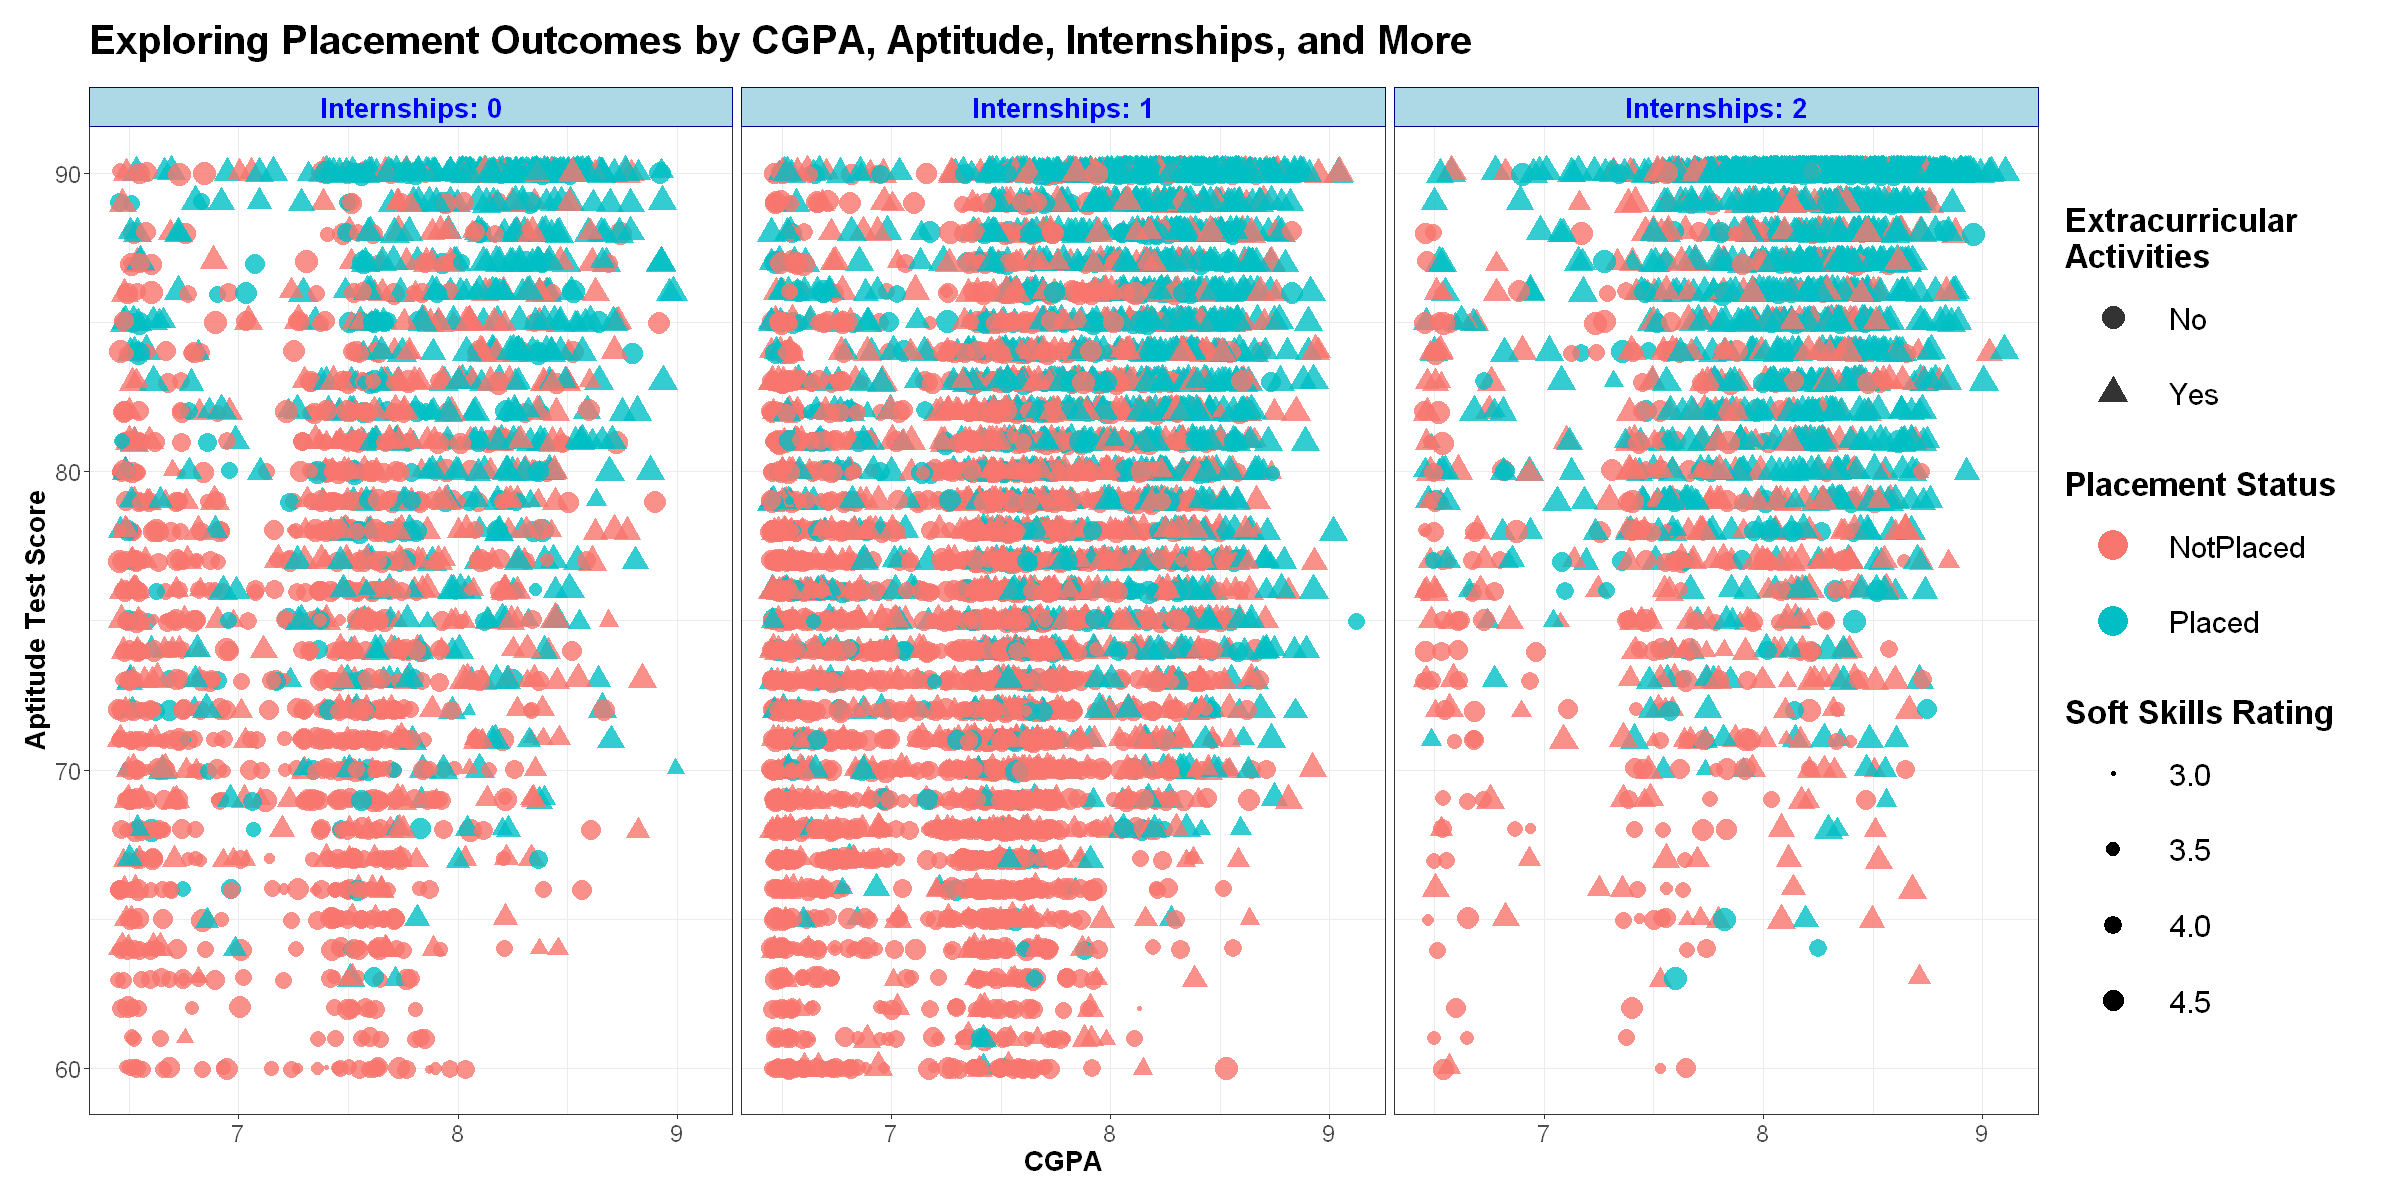

In [91]:
# Set figure size before plotting
options(repr.plot.width=20, repr.plot.height=10)

set.seed(123)
sampled_data <- data[sample(nrow(data), size = nrow(data) * 1), ]

plot <- ggplot(
  data = sampled_data,
  aes(x = CGPA, 
      y = AptitudeTestScore, 
      color = PlacementStatus,
      shape = ExtracurricularActivities,
      size = SoftSkillsRating)
) +
  geom_jitter(alpha = 0.8, width = 0.05, height = 0.05) +
  scale_shape_manual(values = c("No" = 16, "Yes" = 17)) +
  facet_wrap(~ Internships, labeller = label_both) +
  labs(
    title = "Exploring Placement Outcomes by CGPA, Aptitude, Internships, and More",
    x = "CGPA",
    y = "Aptitude Test Score",
    color = "Placement Status",
    shape = "Extracurricular\nActivities",
    size = "Soft Skills Rating"
  ) +
  theme_bw() +
  theme(
    strip.text = element_text(size = 16, face = "bold", color = "blue"),
    strip.background = element_rect(fill = "lightblue", color = "darkblue"),
    legend.title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 18),
    legend.key.size = unit(2.0, "cm"),
    legend.key.height = unit(1.6, "cm"),
    legend.key.width = unit(2.0, "cm"),
    plot.title = element_text(face = "bold", size = 24, margin = margin(b = 15)),
    axis.title = element_text(size = 16, face = "bold"),
    axis.text = element_text(size = 14),
    plot.background = element_rect(fill = "white", color = NA),
    panel.background = element_rect(fill = "white", color = NA),
    plot.margin = margin(0.5, 1, 0.5, 0.5, "cm")            
  ) +
  # IMPORTANT CHANGE: Modify guides to make color points larger in the legend
  guides(
    # Make color dots much larger in the legend
    color = guide_legend(override.aes = list(size = 8, alpha = 1)),
    # Keep shape settings
    shape = guide_legend(override.aes = list(size = 5.5, stroke = 1.5)),
    # Keep size settings
    size = guide_legend(override.aes = list(alpha = 1))
  )

print(plot)
ggsave("large_plot.png", plot, width=22, height=10, dpi=300, bg = "white")

#### **NOTE: The plot of all 10,000 students looks extremely messy, so I randomly sample 500 students from the dataset and show the plot below:** 

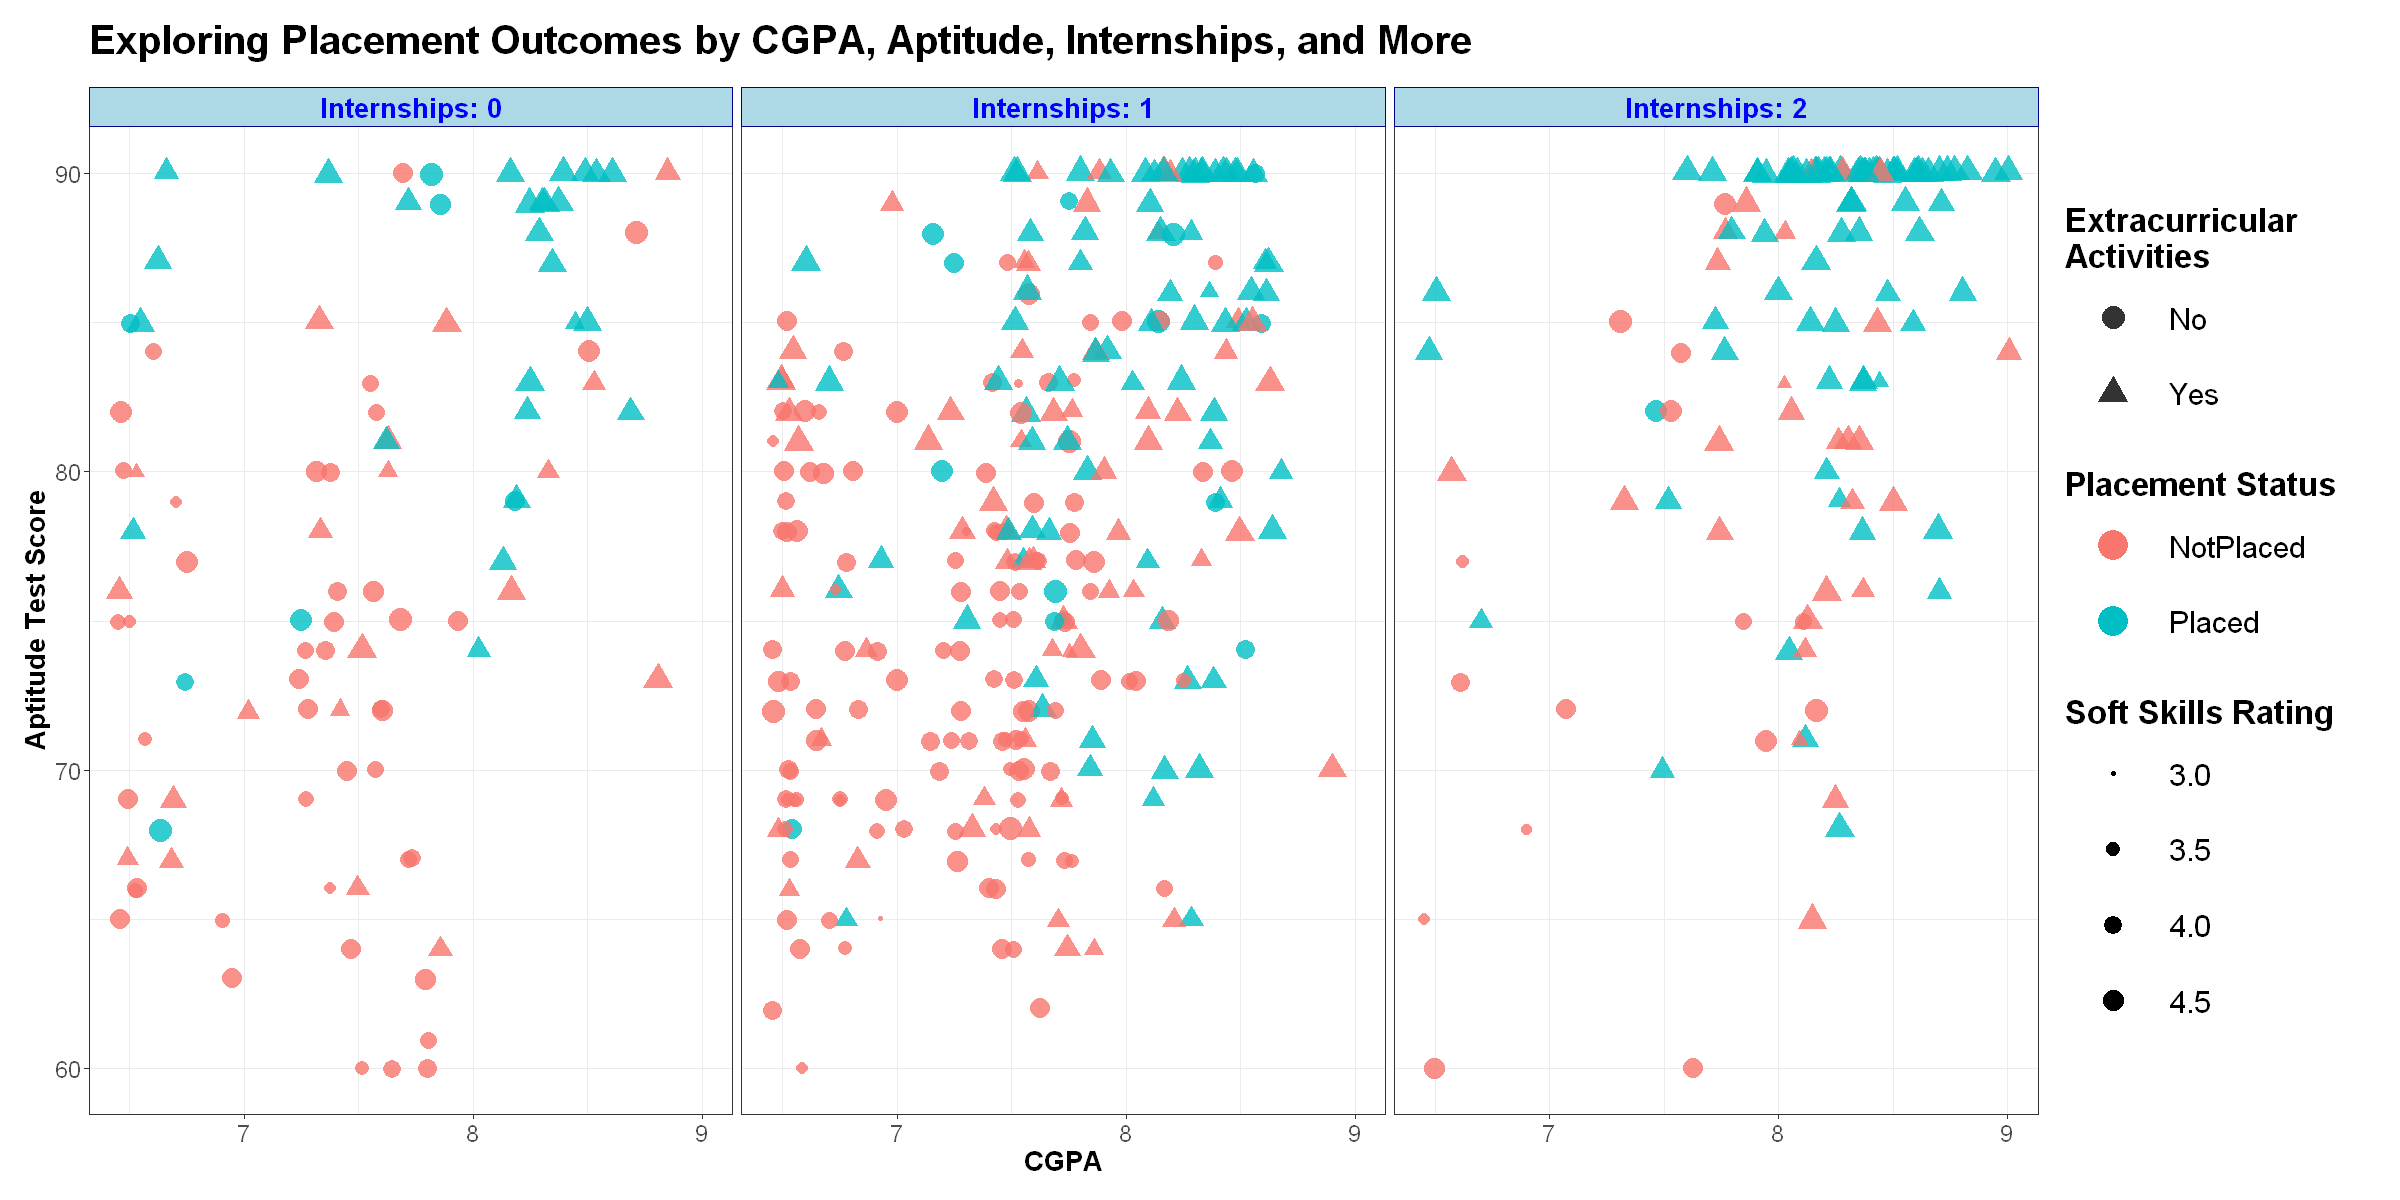

In [92]:
# Set figure size before plotting
options(repr.plot.width=20, repr.plot.height=10)

set.seed(123)
sampled_data <- data[sample(nrow(data), size = nrow(data) * 0.05), ]

plot <- ggplot(
  data = sampled_data,
  aes(x = CGPA, 
      y = AptitudeTestScore, 
      color = PlacementStatus,
      shape = ExtracurricularActivities,
      size = SoftSkillsRating)
) +
  geom_jitter(alpha = 0.8, width = 0.05, height = 0.05) +
  scale_shape_manual(values = c("No" = 16, "Yes" = 17)) +
  facet_wrap(~ Internships, labeller = label_both) +
  labs(
    title = "Exploring Placement Outcomes by CGPA, Aptitude, Internships, and More",
    x = "CGPA",
    y = "Aptitude Test Score",
    color = "Placement Status",
    shape = "Extracurricular\nActivities",
    size = "Soft Skills Rating"
  ) +
  theme_bw() +
  theme(
    strip.text = element_text(size = 16, face = "bold", color = "blue"),
    strip.background = element_rect(fill = "lightblue", color = "darkblue"),
    legend.title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 18),
    legend.key.size = unit(2.0, "cm"),
    legend.key.height = unit(1.6, "cm"),
    legend.key.width = unit(2.0, "cm"),
    plot.title = element_text(face = "bold", size = 24, margin = margin(b = 15)),
    axis.title = element_text(size = 16, face = "bold"),
    axis.text = element_text(size = 14),
    plot.background = element_rect(fill = "white", color = NA),
    panel.background = element_rect(fill = "white", color = NA),
    plot.margin = margin(0.5, 1, 0.5, 0.5, "cm")            
  ) +
  # IMPORTANT CHANGE: Modify guides to make color points larger in the legend
  guides(
    # Make color dots much larger in the legend
    color = guide_legend(override.aes = list(size = 8, alpha = 1)),
    # Keep shape settings
    shape = guide_legend(override.aes = list(size = 5.5, stroke = 1.5)),
    # Keep size settings
    size = guide_legend(override.aes = list(alpha = 1))
  )

print(plot)
ggsave("large_plot_clearer.png", plot, width=22, height=10, dpi=300, bg = "white")

In [93]:
#It's suspicious that CGPA is having collinearity with SSC_marks and HSC_Marks, checking here
GPA_data <- data %>% select(CGPA, SSC_Marks, HSC_Marks)
cor_matrix <- correlate(GPA_data)
cor_matrix

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


term,CGPA,SSC_Marks,HSC_Marks
<chr>,<dbl>,<dbl>,<dbl>
CGPA,NA,0.4049713,0.4623127
SSC_Marks,0.4049713,NA,0.5249161
HSC_Marks,0.4623127,0.5249161,NA


# Methods and Plan & Computational Code and Output

### (1) Methods and Plan
For this prediction assignment, I propose using **Logistic Regression** to model and analyze the relationship between students' various measurements and their placement status.

#### 1.1 Why is this method appropriate?
**Logistic Regression** is well-suited for binary classification problems and allows us to interpret the effects of explanatory variables on the probability of being placed or not (not just class labels). It is easy to implement and interpret. The coefficients provide direct insight into how each covariate affects the log-odds of being placed or not, and p-values and confidence intervals (CIs) for the model coefficients are straightforward to generate. This is particularly valuable when I need to explain the model's decisions to non-technical stakeholders.

##### 1.2 Which assumptions are required to apply the method selected?
* **Independence of Observations**: Each observation should be independent of the others.
* **Binary Response**: The response variable is binary.
* **Sample Size**: The sample size is large enough (which is satisfied in our case).
* **Linearity**: There should be a linear relationship between the independent variables (explanatory) and the log odds of the dependent variable (response).
* **Multicollinearity**: After data cleaning, there should be little or no multicollinearity among the independent variables.

##### 1.3 Potential Limitations or Weaknesses of the Method Selected
* **Model Simplicity**: While logistic regression is straightforward, it may not capture complex non-linear relationships or interactions among variables as effectively as more advanced methods. Although it offers great interpretability, it might not provide the highest predictive accuracy compared to more complex models.
* **Outliers and Class Imbalance**: Logistic Regression is sensitive to outliers in the covariate space, which can affect the estimated coefficients and potentially skew the model's performance. Additionally, imbalanced classes may affect model performance if not addressed with appropriate techniques.

### (2) Computational Code and Output

#### 2.1 Write computational code to implement the method proposed:

##### 2.1.1 Data Preprocessing:
* Homoscedasticity is not an assumption in Logistic Regression and will not affect performance.
* Normality of residuals (skewness) is also not an assumption here, but highly skewed data may potentially affect performance.


### Check Class Imbalance

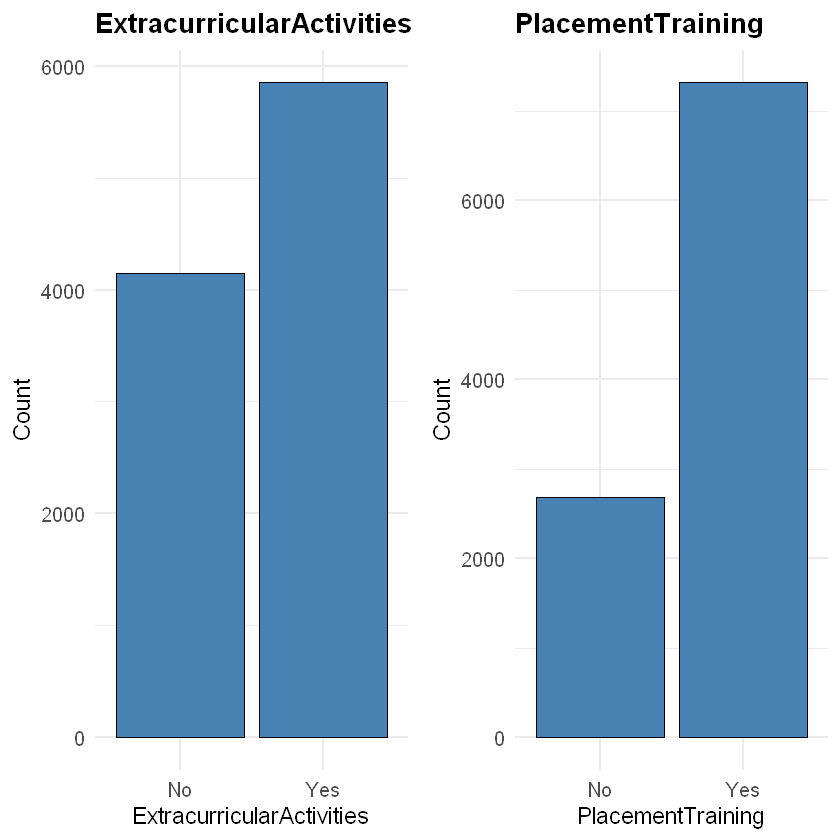

In [51]:
categorical_columns <- c("ExtracurricularActivities", "PlacementTraining")
plots <- list()

# Loop over each categorical variable to build a bar plot
for (cat_col in categorical_columns) {
  p <- ggplot(data = data, aes_string(x = cat_col)) +
    geom_bar(fill = "steelblue", color = "black") +
    labs(
      title = paste( cat_col),
      x = cat_col,
      y = "Count"
    ) +
    theme_minimal(base_size = 14) +
    theme(
      plot.title = element_text(size = 16, face = "bold"),
      axis.title = element_text(size = 14),
      axis.text = element_text(size = 12)
    )
  plots[[cat_col]] <- p
}
grid.arrange(grobs = plots, ncol = 2)

By analyzing the above class imbalance plot for the categorical covariates, it is clear and reasonable to assume that the model will not overfit to the majority classes while underfitting the minority classes, as there is no significant class imbalance.


### Investigate Multicollinearity:

In [ ]:

numeric_data <- car_data %>% select_if(is.numeric)
car_data_new <- car_data %>% 
  mutate_at(c("fueltype", "aspiration", "doornumber"), 
            as.factor)

### Check Skewness of Continuous Covariates

Warning message in geom_bar(fill = "steelblue", color = "black", bins = 15):
"Ignoring unknown parameters: `bins`"
Warning message in geom_bar(fill = "steelblue", color = "black", bins = 15):
"Ignoring unknown parameters: `bins`"
Warning message in geom_bar(fill = "steelblue", color = "black", bins = 15):
"Ignoring unknown parameters: `bins`"
Warning message in geom_bar(fill = "steelblue", color = "black", bins = 15):
"Ignoring unknown parameters: `bins`"
Warning message in geom_bar(fill = "steelblue", color = "black", bins = 15):
"Ignoring unknown parameters: `bins`"
Warning message in geom_bar(fill = "steelblue", color = "black", bins = 15):
"Ignoring unknown parameters: `bins`"
Warning message in geom_bar(fill = "steelblue", color = "black", bins = 15):
"Ignoring unknown parameters: `bins`"


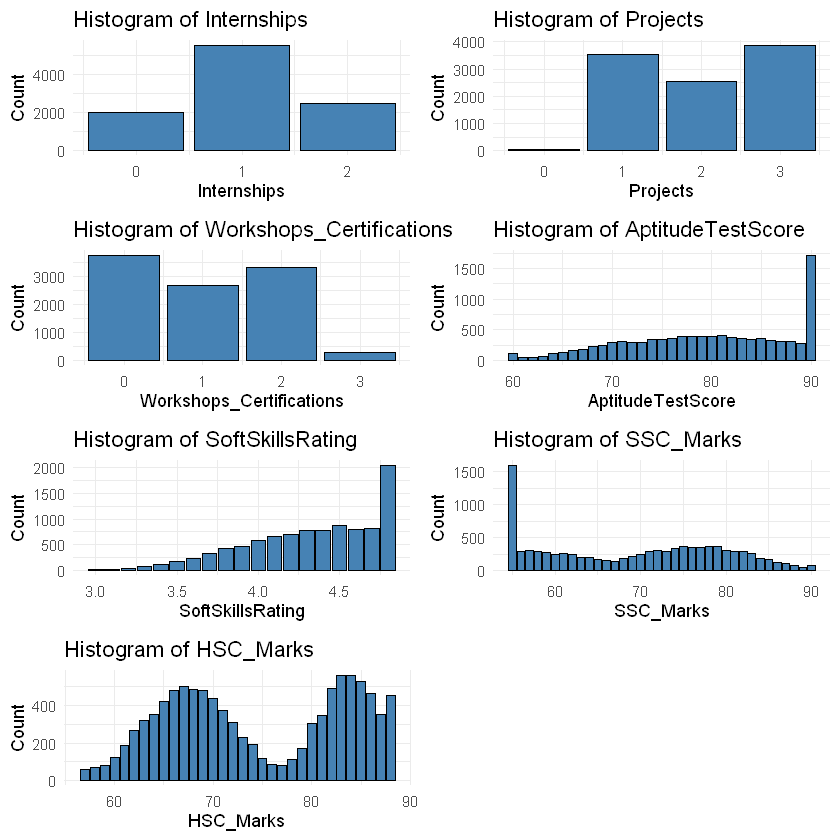

In [73]:

names(data)[names(data) == "Workshops/Certifications"] <- "Workshops_Certifications"
df_num <- c("Internships","Projects","Workshops_Certifications","AptitudeTestScore","SoftSkillsRating","SSC_Marks","HSC_Marks")

plots <- list()
for (colname in df_num) {
  p <- ggplot(data, aes_string(x = colname)) +
    geom_bar(fill = "steelblue", color = "black", bins = 15) +
    labs(title = paste("Histogram of", colname),
         x = colname,
         y = "Count") +
    theme_minimal()
    
  
  plots[[colname]] <- p
}

# Arrange all plots in a grid (2 columns, for example)
grid.arrange(grobs = plots, ncol = 2)

By observing the plot above, I would say there is no clearly noticeable heavy skewness that may cause problems in the logistic regression model. However, it is evident that, for example, the **AptitudeTestScore** feature has a high frequency of counts at the value of 90.


# Check Multicollinearity: 

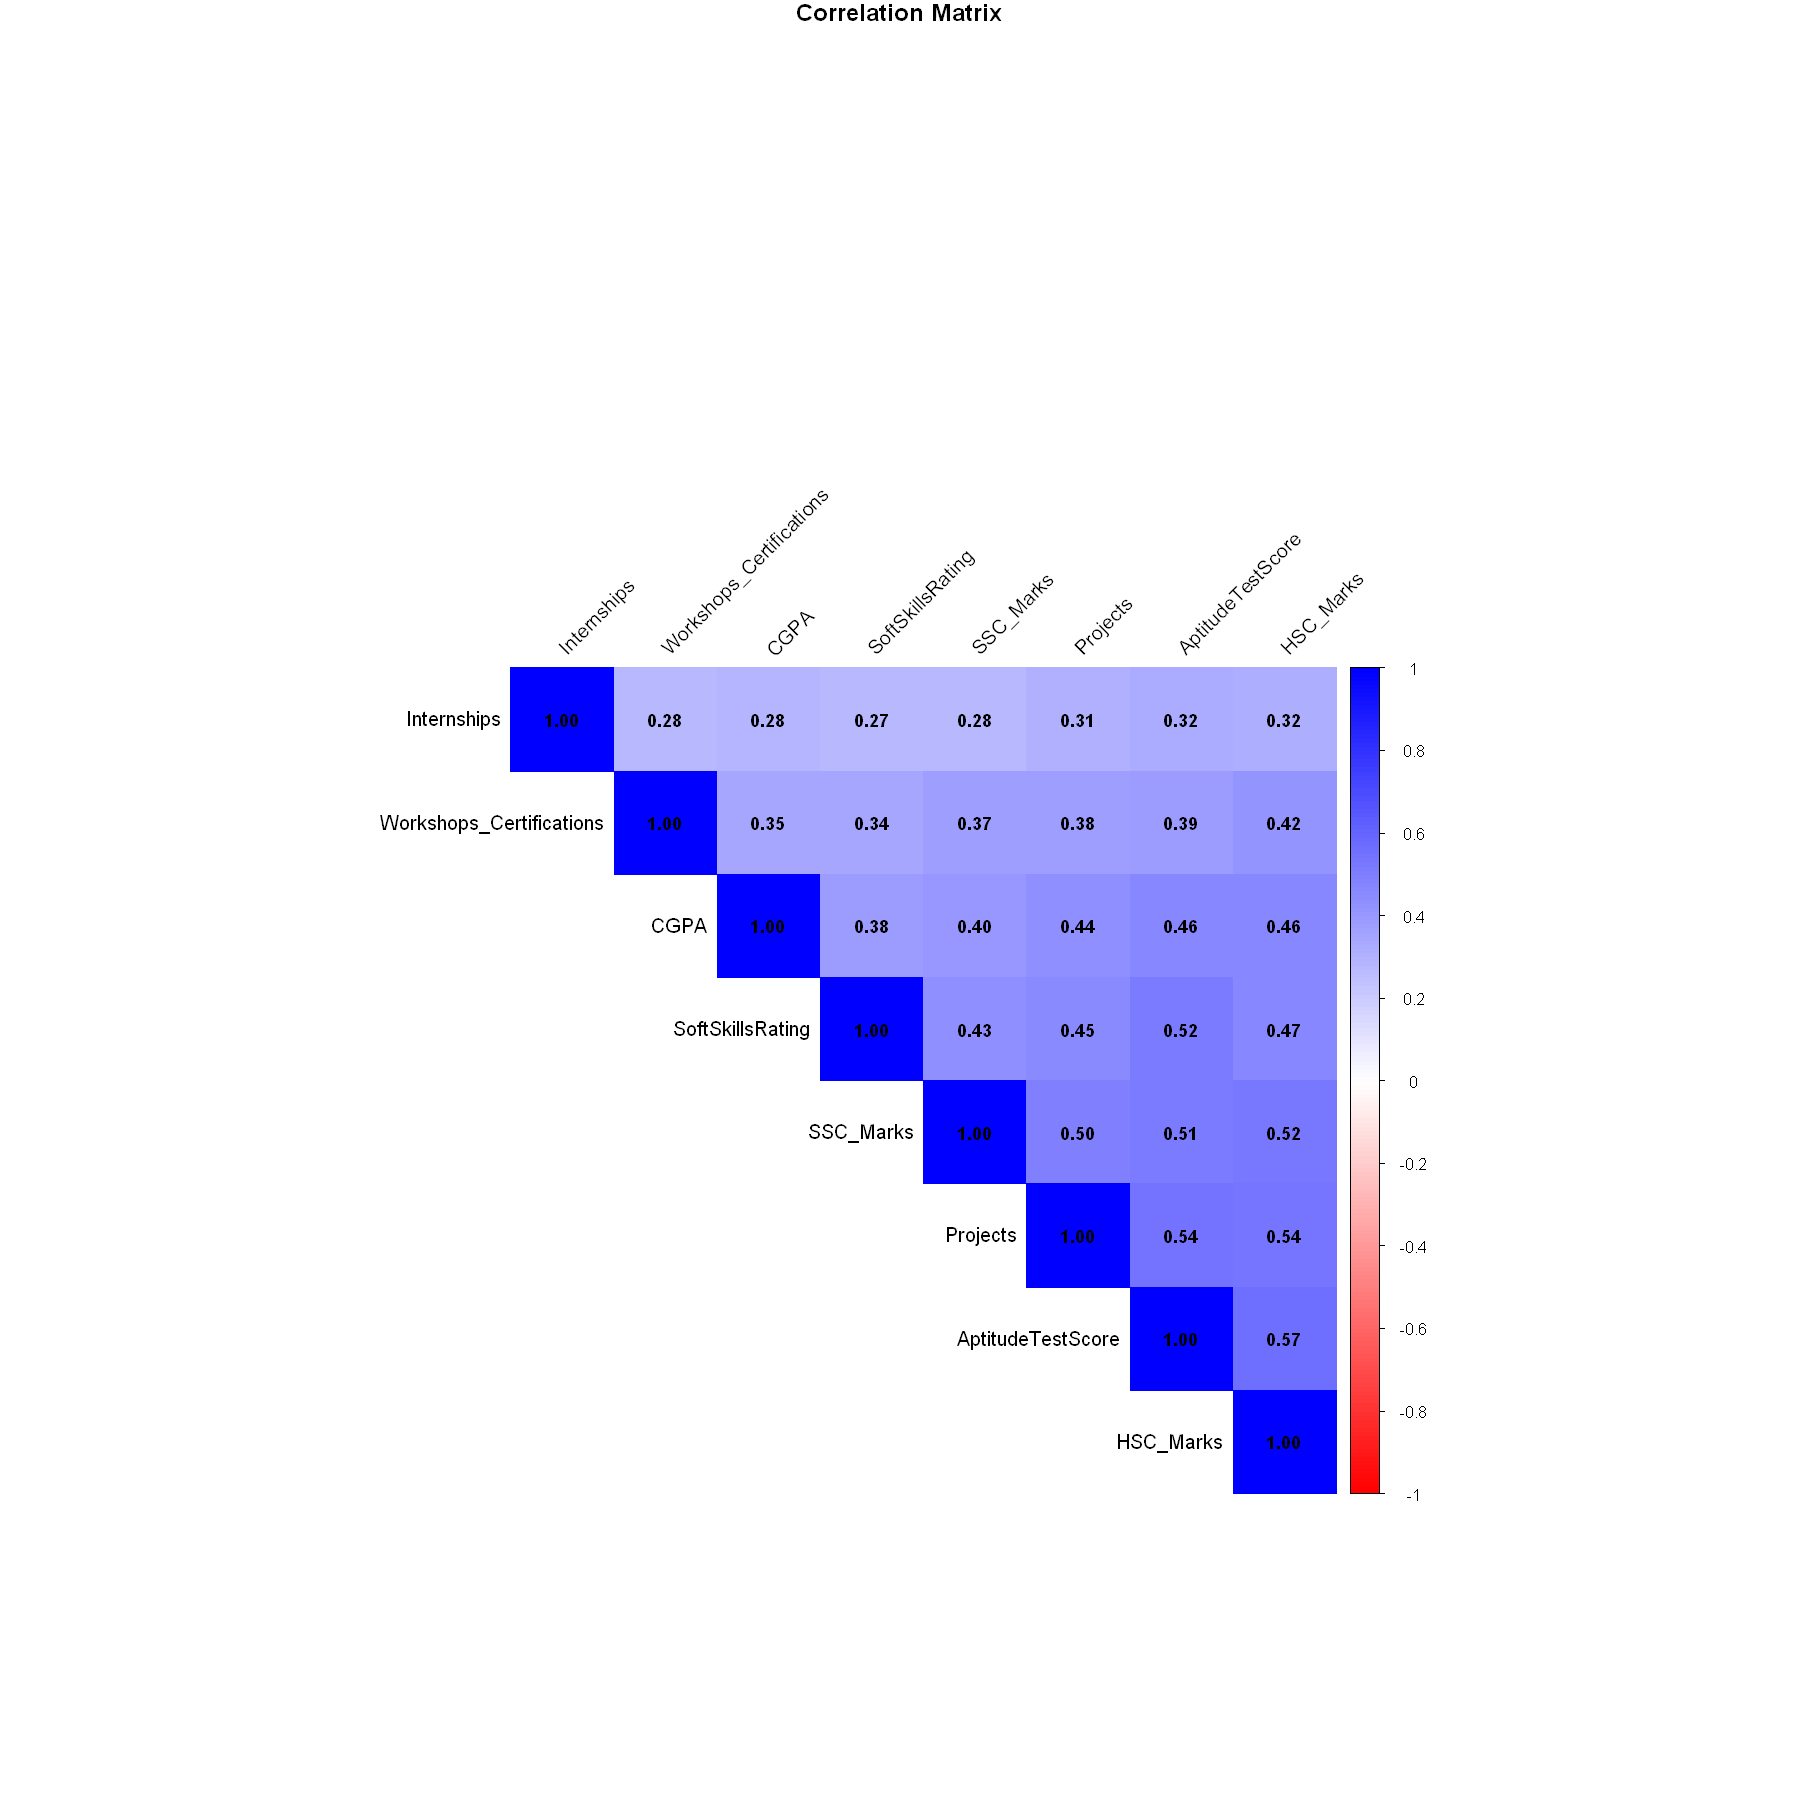

In [81]:

options(repr.plot.width = 15, repr.plot.height = 15)

numeric_data <- data %>% select_if(is.numeric)
cor_matrix <- cor(numeric_data, use = "complete.obs")

corrplot(cor_matrix, 
         method = "color",
         type = "upper",
         order = "hclust",
         tl.col = "black",
         tl.srt = 45,
         col = colorRampPalette(c("red", "white", "blue"))(200),
         title = "Correlation Matrix",
         mar = c(0,0,1,0),
         addCoef.col = "black",
         number.cex = 0.9
)


The data is pretty clean and there's no high corrleation between two covariates.

#### 2.2 Use only one visualization or table to report the results

Since I am doing a prediction model, I first split the dataset into training and test sets. Then, I fit the model on the training split and used it to predict using the test data. Finally, I generated a confusion matrix and calculated the corresponding metrics.


In [122]:
set.seed(301)

library(tibble)
#train test split
sample_size <- floor(0.8 * nrow(data))
train_indices <- sample(seq_len(nrow(data)), size = sample_size)
train_data <- data[train_indices, ]
test_data <- data[-train_indices, ]


log_model <- glm(PlacementStatus ~ .,
                 data = train_data,
                 family = binomial)

summary(log_model)


Call:
glm(formula = PlacementStatus ~ ., family = binomial, data = train_data)

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -17.978785   0.587959 -30.578  < 2e-16 ***
CGPA                           0.401652   0.056176   7.150 8.68e-13 ***
Internships                    0.011326   0.047719   0.237 0.812381    
Projects                       0.228844   0.041800   5.475 4.38e-08 ***
Workshops_Certifications       0.127108   0.035372   3.593 0.000326 ***
AptitudeTestScore              0.068073   0.005216  13.051  < 2e-16 ***
SoftSkillsRating               0.627116   0.093501   6.707 1.99e-11 ***
ExtracurricularActivitiesYes   0.744750   0.075267   9.895  < 2e-16 ***
PlacementTrainingYes           0.934918   0.079767  11.721  < 2e-16 ***
SSC_Marks                      0.028799   0.003507   8.212  < 2e-16 ***
HSC_Marks                      0.032347   0.004265   7.584 3.36e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.

In [123]:
# Predict on the test set (probabilities)
pred_probs <- predict(log_model, newdata = test_data, type = "response")

# Convert probabilities to class predictions (threshold = 0.5)
pred_class <- ifelse(pred_probs > 0.5, "Placed", "NotPlaced")

# Build a confusion matrix
actual <- test_data$PlacementStatus
predicted <- factor(pred_class, levels = c("NotPlaced", "Placed"))
cm <- table(
  Predicted = factor(pred_class, levels = c("NotPlaced", "Placed")),
  Actual    = test_data$PlacementStatus
)

#Confusion Matrix!
cm

           Actual
Predicted   NotPlaced Placed
  NotPlaced       979    198
  Placed          179    644

In [125]:
# Extract counts from the confusion matrix
TN <- cm["NotPlaced", "NotPlaced"]
TP <- cm["Placed", "Placed"]
FN <- cm["NotPlaced", "Placed"]
FP <- cm["Placed", "NotPlaced"]

# Calculate common metrics
accuracy    <- (TP + TN) / sum(cm)
recall <- TP / (TP + FN) 
specificity <- TN / (TN + FP)          # True Negative Rate
precision   <- TP / (TP + FP)
f1_score    <- 2 * (precision * sensitivity) / (precision + sensitivity)

# Create a data frame for easy display
results_df <- data.frame(
  Metric = c("Accuracy", "Recall", "Specificity", "Precision", "F1 Score"),
  Value  = c(accuracy, sensitivity, specificity, precision, f1_score)
)

# Optionally round the values to 3 decimal places
results_df$Value <- round(results_df$Value, 3)

# Print the data frame
#tidy(results_df)

tidy_results <- as_tibble(results_df)
tidy_results

Metric,Value
<chr>,<dbl>
Accuracy,0.811
Recall,0.765
Specificity,0.845
Precision,0.783
F1 Score,0.774


#### 2.3 A brief Interpretation of the results and comments about the potential problems 

Note that in the summary output of the logistic regression model, the covariate **Internships** does not seem to be significant and has a large p-value, indicating that it may have little predictive effect on the response variable and could be dropped through valid feature selection.

Our logistic regression model achieves about 81.1% accuracy, indicating that it generally distinguishes “Placed” vs. “Not Placed” students well. A recall of around 76%, precision of about 0.783, as well as the F1 Score and Specificity, all suggest a balanced performance between identifying truly placed students and minimizing false alarms. However, on average, these scores are not high compared to those of a strong predictive model, which may be due to overlapping features or mild class imbalance observed earlier in the covariates: **Projects**, **Workshops_Certifications**, **AptitudeTestScore**, **SoftSkillsRating**, and **SSC_Marks**.
